## **Cтоит задача проанализировать данные и спрогнозировать отток пользователей телекоммуникационной компании**

## Codebook

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [ ]:
#Импортируем  необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
#импортируем датасет
df_main = pd.read_csv('telecom_users.csv')

#Смотрим общий вид датасета
df_main.head(360)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,1362,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
356,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
357,1212,4291-SHSBH,Male,0,No,No,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35,No
358,2722,4635-EJYPD,Male,0,Yes,Yes,32,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95,No


In [ ]:
#Описание датасета (Заодно смотрим наличие пропущенных значений)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


---


Имеется 22 фичи (одна из них целевая) и 5986 объектов.

4 фичи являются цифровыми, 18 не цифровыми (в дальнейшем мы переведём не цифровые фичи в цифровой формат). Однако сразу переведём признак TotalCharges в цифровой формат, так как по факту он является типом float.

Пропущенный значения отсутствуют, но проверим более точно.


In [ ]:
#Проверяем наличие пропущенных значений
df_main.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64



---


Пропущенные значения отсутствуют.

In [ ]:
#Проверим имеются ли в датасете значения обозначенные пробелом
#Если такие значения будут, сохраним номера объектов в список, для дальнейшего редактирования

space_values = []

for i in range(len(df_main)):
  for j in range(len(df_main.columns.values)):
    if df_main.iloc[i, j] == ' ':
      print(f'Имеются незаполненные значения в столбце {df_main.columns[j]} в объекте №{i}')
      space_values.append(i)
    

Имеются незаполненные значения в столбце TotalCharges в объекте №356
Имеются незаполненные значения в столбце TotalCharges в объекте №634
Имеются незаполненные значения в столбце TotalCharges в объекте №2771
Имеются незаполненные значения в столбце TotalCharges в объекте №3086
Имеются незаполненные значения в столбце TotalCharges в объекте №3255
Имеются незаполненные значения в столбце TotalCharges в объекте №4326
Имеются незаполненные значения в столбце TotalCharges в объекте №5375
Имеются незаполненные значения в столбце TotalCharges в объекте №5382
Имеются незаполненные значения в столбце TotalCharges в объекте №5695
Имеются незаполненные значения в столбце TotalCharges в объекте №5951


In [ ]:
#Посмотрим на полные данные с пропущенныеми значениями
df_main.iloc[space_values]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No




---


В нашем датасете имеются пробелы в данных по суммарным затратам. Это происходит из-за того что tenure равно нулю (человек является клиентом ноль месяцев). Соответственно и затраты равны нулю. Таким образом заполним пробелы нулями.

In [ ]:
#Исправим имеющиеся пробелы в столбце 
df_main.iloc[space_values, -2] = 0

In [ ]:
# Переведём фичу TotalCharges в цифровой формат
df_main.TotalCharges = pd.to_numeric(df_main.TotalCharges)

In [ ]:
#Смотрим описание цифровых значений датасета
df_main.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213,2294.221559
std,2035.705666,0.367909,24.516391,30.114702,2274.164124
min,0.000000,0.000000,0.000000,18.250000,0.000000
25%,1777.250000,0.000000,9.000000,35.650000,401.587500
50%,3546.500000,0.000000,29.000000,70.400000,1408.575000
75%,5291.750000,0.000000,56.000000,89.900000,3841.500000
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


Признак Unnamed:0 не рассматриваем, в дальнейшем этот столбец будет удалён.

В данной таблице видно максимальный, минимальные и средние значения по месяцам пользования, по ежемесячной плате и по общей сумме затрат.

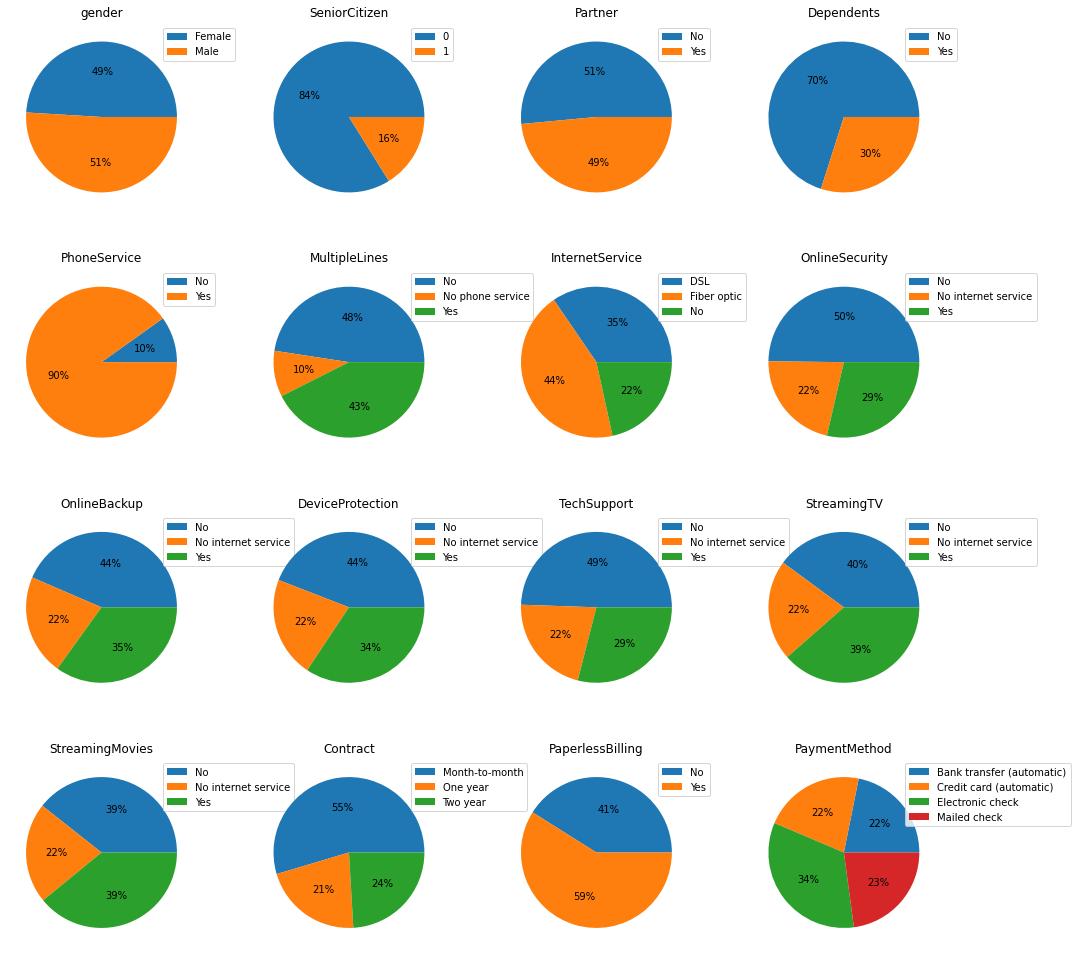

In [ ]:
#Посмотрим распределение данных некоторых признаков

#Список рассматриваемых признаков (исключаем некоторые)
feature_count_list = df_main.columns.values
feature_count_list = np.delete(feature_count_list, [0, 1, 6, 19, 20, 21])

# Создаем общий холст
fig, axs = plt.subplots(4, 4, figsize = (17, 17))
plt.subplots_adjust(hspace=0.3) #Регулируем расстояние между графиками

#С помощью цикла смотрим количество данных каждого признака
for i in range(4):
  for j in range(4):
    axs[i][j].pie(df_main.groupby(feature_count_list[(i*4)+j]).count().iloc[:, 0], autopct='%1.0f%%')
    axs[i][j].legend(labels=df_main.groupby(feature_count_list[(i*4)+j]).count().index, loc='upper left', bbox_to_anchor=(0.8, 1))
    axs[i][j].set_title(feature_count_list[(i*4)+j])


plt.show()

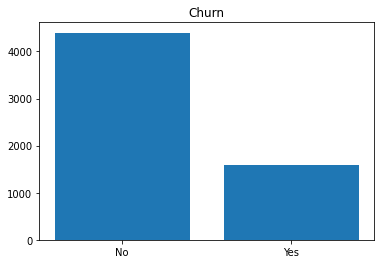

In [ ]:
#Отдельно рассмотрим целевой признак
plt.bar(df_main.groupby('Churn').count().index, df_main.groupby('Churn').count().iloc[:, 0])
plt.title('Churn')

plt.show()



---


Следует отметить, что датасет несбалансирован. В дальнейшем это будет учтено при выборе метрики качества модели.

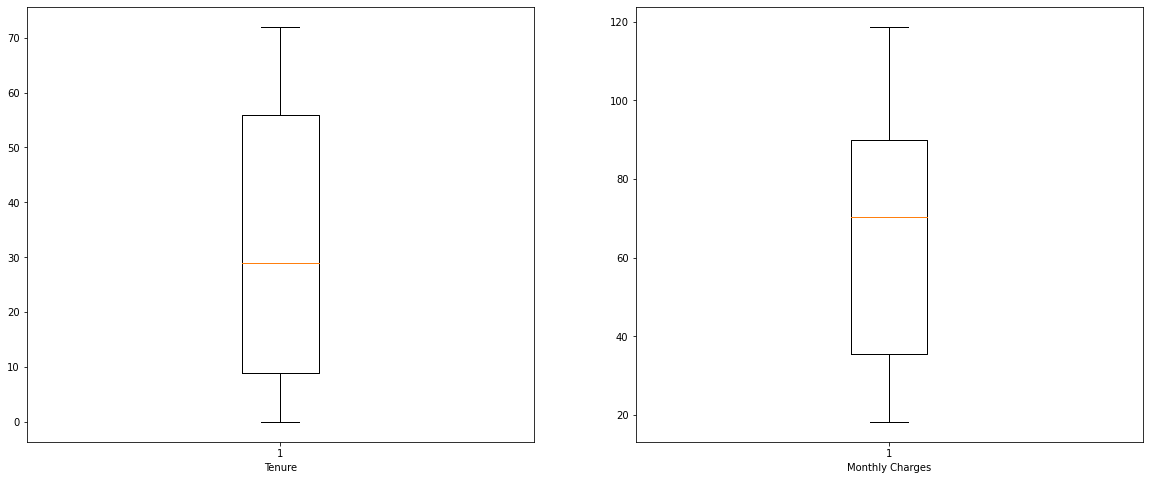

In [ ]:
#Проанализируем остальные фичи на наличие выбросов и аномолий
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].boxplot(df_main.tenure, showfliers=True)
ax[0].set_xlabel('Tenure')

ax[1].boxplot(df_main.MonthlyCharges)
ax[1].set_xlabel('Monthly Charges')

plt.show()



---


Выбросы и аномалии отсутствуют.

In [ ]:
#Переведём фичи к цифровому виду, что бы в дальнейшем иметь возможность их обрабатывать

#Переведём пол
df_main.loc[df_main.gender == 'Male', 'gender'] = 0
df_main.loc[df_main.gender == 'Female', 'gender'] = 1

#Переведём остальные фичи к цифровому виду с помощью словаря и функции map
#Какие фичи переводим
feature_num = df_main.columns.values
feature_num = np.delete(feature_num, [0, 1, 2, 3, 6, 9, 16, 18, 19, 20])

#Создадим словарь для перевода
yes_no_nointernet = {'No':0, 'Yes':1, 'No internet service':2, 'No phone service':3}

#В цикле пройдём по необходимым фичам и переведем в соответствии со словарем
for i in feature_num:
  df_main[i] = df_main[i].map(yes_no_nointernet)

#Доработаем оставшиеся фичи тем же способом
internet_service = {'No':0, 'DSL':1, 'Fiber optic':2}
contract = {'Month-to-month':0, 'One year':1, 'Two year':2}
payment_method = {'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3}

df_main.InternetService = df_main.InternetService.map(internet_service)
df_main.Contract = df_main.Contract.map(contract)
df_main.PaymentMethod = df_main.PaymentMethod.map(payment_method)

In [ ]:
#Удалим лишние столбцы (Которые никак не влияют на отток)
df_main = df_main.drop(['Unnamed: 0', 'customerID'], axis=1)

In [ ]:
#Получаем датасет следующего вида
df_main.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,72,1,1,0,2,2,2,2,2,2,2,0,3,24.10,1734.65,0
1,1,0,0,0,44,1,0,2,0,1,1,0,1,0,0,1,3,88.15,3973.20,0
2,1,1,1,0,38,1,1,2,0,0,0,0,0,0,0,1,2,74.95,2869.85,1
3,0,0,0,0,4,1,0,1,0,0,0,0,0,1,0,1,0,55.90,238.50,0
4,0,0,0,0,2,1,0,1,1,0,1,0,0,0,0,0,0,53.45,119.50,0




---



###Выводы:

На данном этапе весь датасет переведен в цифровой формат. Пропущенные значения отсутствуют. Лишние данные удалены. Датасет готов к дальнейшей обработке.

По имеющимся признакам можно сделать следующие выводы:



1.   Поровну распределены данные следующих признаков
    *   Gender (мужчины/женщины)
    *   Partner (имеется партнёр/отсутствует партнер)
    *   InternetService (DSL/Fiber optic/No)
    *   OnlineBackup (Yes/No/No internet service)
    *   DeviceProtection (Yes/No/No internet service)
    *   StreamingTV (Yes/No/No internet service)
    *   StreamingMovies (Yes/No/No internet service)
    *   PaymentMethod (Electronic check, Mailed check, Bank transfer, Credit card)

  В некоторых пунктах видны перегибы в пользу конкретного значения, в целом данные по этим фичам распределены равномерно.


2.   В следующих фичах видны преобладания в пользу конкретного значения:
    *   SeniorCitizen (Большинство не пенсионеры - 84%)
    *   Dependents (No - 70%)
    *   Phone Service (Yes - 90%)
    *   Multiple Lines (No - 48%, Yes - 43%)
    *   Online Security (No - 50%)
    *   Tech Support (No - 49%)
    *   Contract (Month-to-month - 55%)
    *   Paperless Billing (Yes - 59%)

3.   По целевому признаку Churn можно сделать вывод, что уходит половина от числа оставшихся (примерно 30%). Таким образом, мы выяснили, что датасет является несбалансированным.
4.   В остальных принаках не найдено каких-либо аномалий и выбросов.







# 2. Исследование зависимостей и формулирование гипотез

В данном разделе я буду опровергать нулевую гипотезу. То есть пытаться найти связь между определенными признаками и таким образом сформировать альтернативные гипотезы.

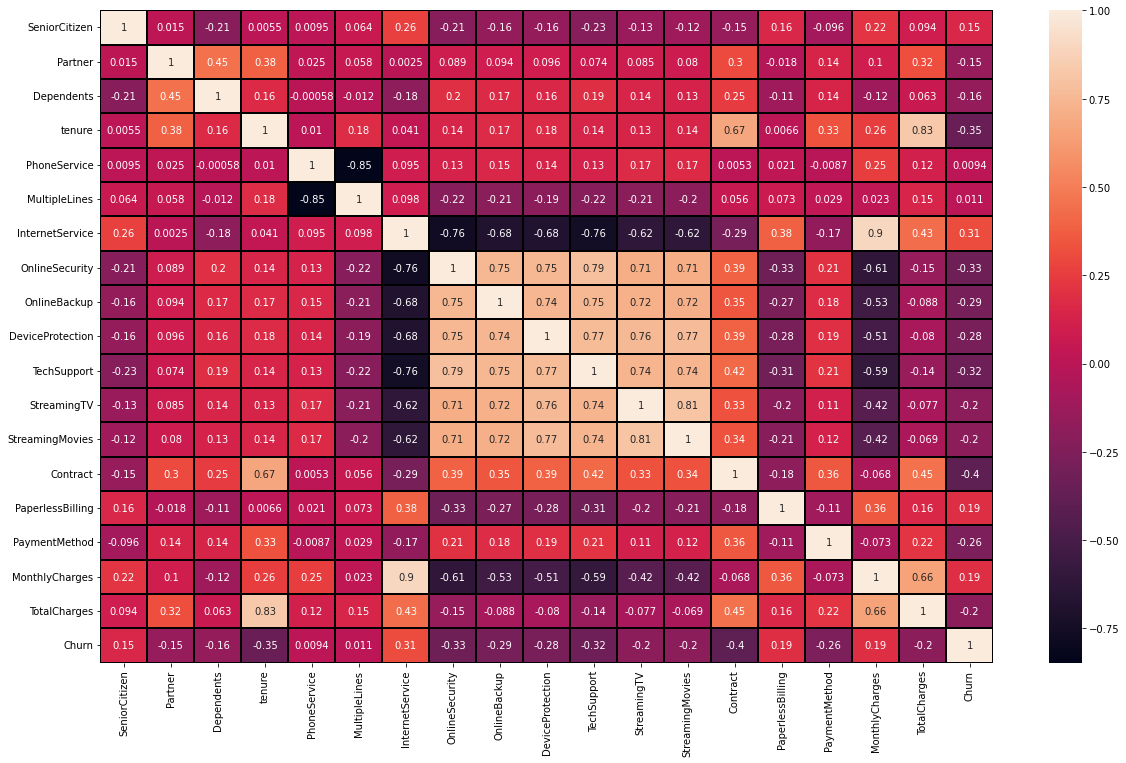

In [ ]:
#Построим тепловую карту для поиска корреляции признаков
corr = df_main.corr()

fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corr, annot=True, linewidths=1, linecolor='black')

plt.show()

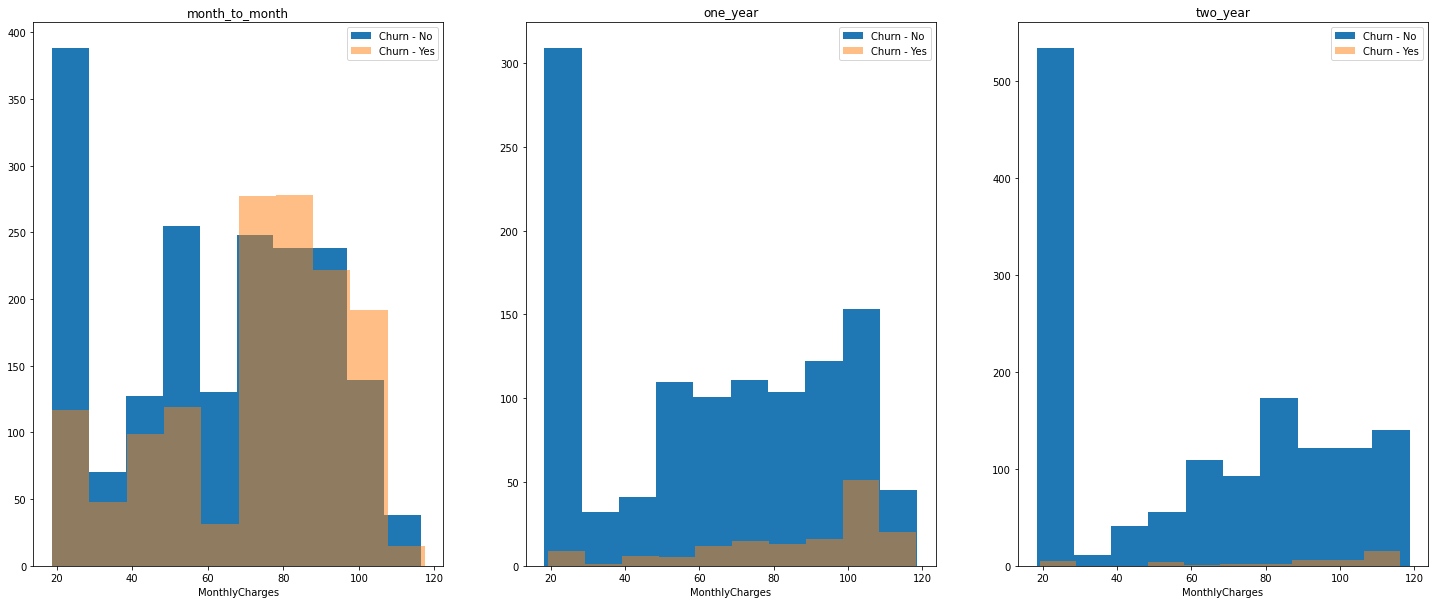

In [ ]:
#Проверим отдельные признаки на зависимость с целевым(Churn)

#Зависимость размера месячной оплаты на настоящий момент

#Поделим по типу контракта

month_to_month = df_main[df_main['Contract'] == 0]
one_year = df_main[df_main['Contract'] == 1]
two_year = df_main[df_main['Contract'] == 2]


fig, axs = plt.subplots(1, 3, figsize=(25,10))

#Эти графики можно завернуть в цикл, но я решил написать код более развернуто (в цикл завернул графики следующей ячейки)

axs[0].hist(month_to_month[month_to_month['Churn'] == 0].MonthlyCharges, label='Churn - No')
axs[0].hist(month_to_month[month_to_month['Churn'] == 1].MonthlyCharges, alpha=0.5, label='Churn - Yes')
axs[0].set_title('month_to_month')
axs[0].set_xlabel('MonthlyCharges')
axs[0].legend()

axs[1].hist(one_year[one_year['Churn'] == 0].MonthlyCharges, label='Churn - No')
axs[1].hist(one_year[one_year['Churn'] == 1].MonthlyCharges, alpha=0.5, label='Churn - Yes')
axs[1].set_title('one_year')
axs[1].set_xlabel('MonthlyCharges')
axs[1].legend()

axs[2].hist(two_year[two_year['Churn'] == 0].MonthlyCharges, label='Churn - No')
axs[2].hist(two_year[two_year['Churn'] == 1].MonthlyCharges, alpha=0.5, label='Churn - Yes')
axs[2].set_title('two_year')
axs[2].set_xlabel('MonthlyCharges')
axs[2].legend()

plt.show()



---


Из графиков хорошо видно, что при контракте "Month to month" и при большом ежемесячном платеже происходит наибольший отток клиентов. Это говорит о том, что люди попробовав сервис в течении одного месяца наиболее вероятно не будут больше пользоваться услугами при очень дорогом ежемесячном платеже.

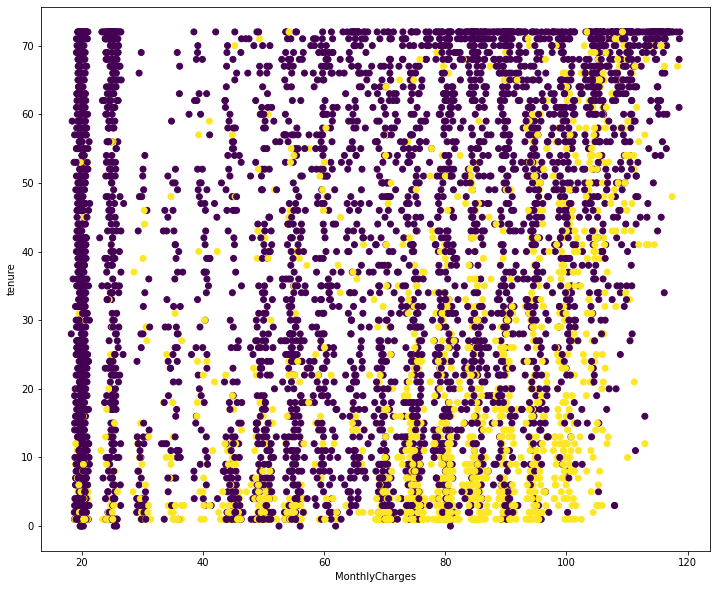

In [ ]:
#Теперь посмотрим на зависимость ежемесячной платы от того сколько месяцев человек является клиентом

fig, axs = plt.subplots(figsize=(12,10))

axs.scatter(x=df_main.MonthlyCharges , y=df_main.tenure, c=df_main.Churn)
axs.set_xlabel('MonthlyCharges')
axs.set_ylabel('tenure')

plt.show()



---


График подтверждает выводы сделанные выше. Чем меньше клиент пользуется сервисом и чем выше платёж, тем выше вероятность его ухода. Самыми стабильными являются клиенты с ежемесячным платежём равным 20. Те кто пользуются услугами компании более 60 месяцев, наименее вероятно уйдут при высоком ежемесячном платеже.

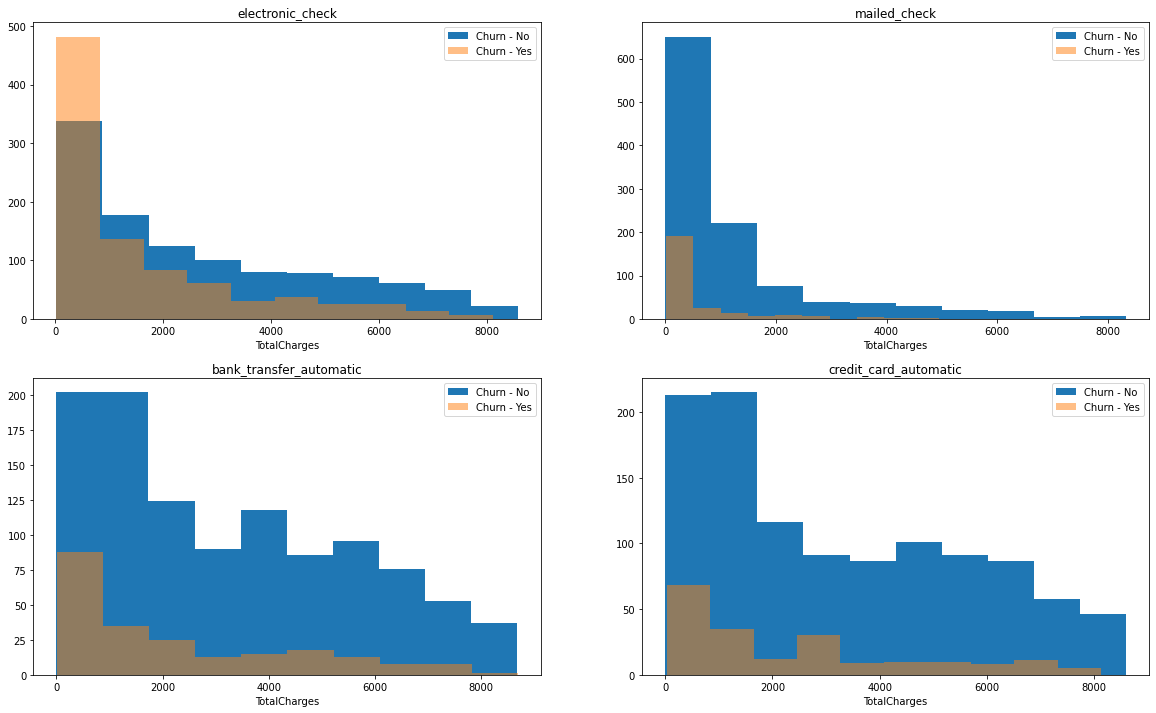

In [ ]:
#Также посмотрим зависимость общей суммы от оттока (и поделим на методы оплаты)
#группируем датасет по методу оплаты
electronic_check = df_main[df_main['PaymentMethod'] == 0]
mailed_check = df_main[df_main['PaymentMethod'] == 1]
bank_transfer_automatic = df_main[df_main['PaymentMethod'] == 2]
credit_card_automatic = df_main[df_main['PaymentMethod'] == 3]

#Форимруем список методов оплаты
feature_payment = [electronic_check, mailed_check, bank_transfer_automatic, credit_card_automatic]
feature_payment_name = ['electronic_check', 'mailed_check', 'bank_transfer_automatic', 'credit_card_automatic']

fig, axs = plt.subplots(2, 2, figsize=(20,12))

for i in range(2):
  for j in range(2):
    axs[i][j].hist(feature_payment[(i*2)+j][feature_payment[(i*2)+j]['Churn'] == 0].TotalCharges, label='Churn - No')
    axs[i][j].hist(feature_payment[(i*2)+j][feature_payment[(i*2)+j]['Churn'] == 1].TotalCharges, alpha=0.5, label='Churn - Yes')
    axs[i][j].set_title(feature_payment_name[(i*2)+j])
    axs[i][j].set_xlabel('TotalCharges')
    axs[i][j].legend()


In [ ]:
#Дополнительно посмотрим какой метод оплаты суммарно принёс больше денег

for i in range(len(feature_payment)):
  print(f'Метод оплаты {feature_payment_name[i]} принёс компании {round(feature_payment[i].TotalCharges.sum(), 2)}')

Метод оплаты electronic_check принёс компании 4257495.85
Метод оплаты mailed_check принёс компании 1450616.6
Метод оплаты bank_transfer_automatic принёс компании 4008030.6
Метод оплаты credit_card_automatic принёс компании 4017067.2




---


На графиках хорошо виден проблемный метод оплаты electronic check. Наибольшее количество ушедших клиентов пользуется именно этим методом. При этом сумма оплаты составляет до 2000. Скорее всего это клиенты которые попробовали воспользоваться сервисом в тестовом режиме (один-два месяца), после чего ушли.

Меньше всего людей уходят при автоматическом методе оплаты. Это стабильные клиенты, которые в долгосрочной перспективе не собираются уходить.

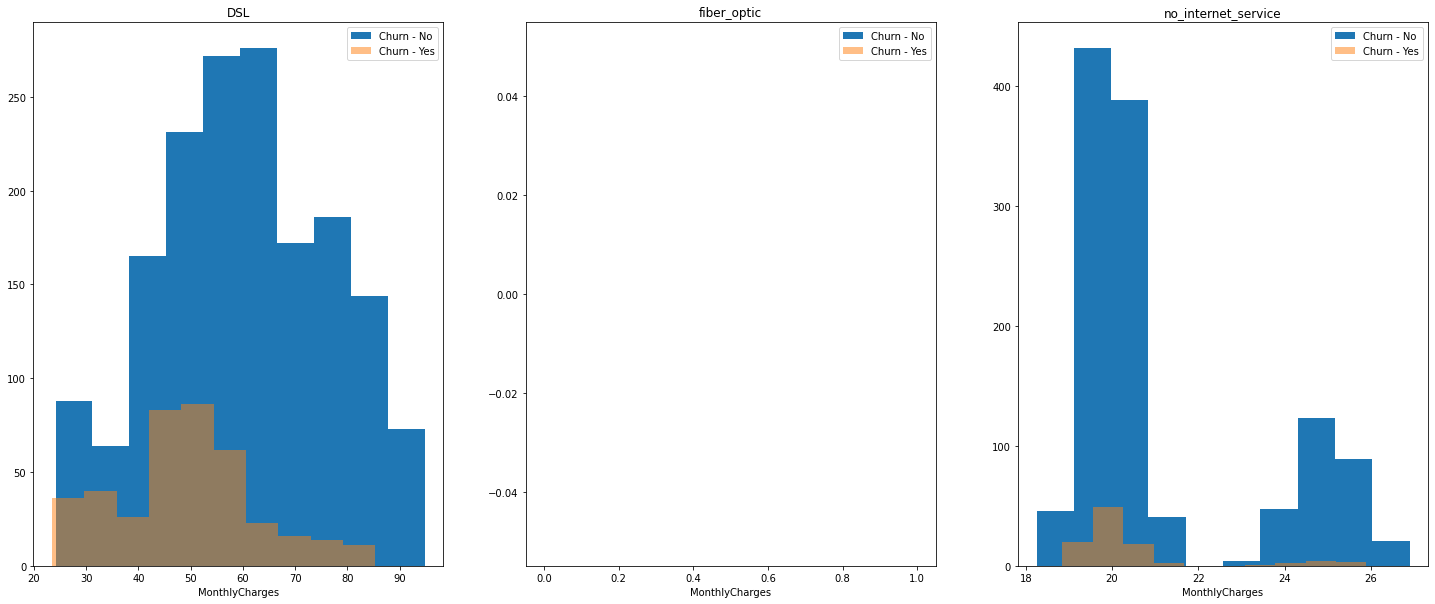

In [ ]:
#Имеется сильная корреляция месячного размера оплаты от интернет провайдера

DSL = df_main[df_main['InternetService'] == 1]
fiber_optic = df_main[df_main['InternetService'] == 3]
no_internet_service = df_main[df_main['InternetService'] == 0]

fig, axs = plt.subplots(1, 3, figsize=(25,10))

#Эти графики можно завернуть в цикл, но я решил написать код более развернуто

axs[0].hist(DSL[DSL['Churn'] == 0].MonthlyCharges, label='Churn - No')
axs[0].hist(DSL[DSL['Churn'] == 1].MonthlyCharges, alpha=0.5, label='Churn - Yes')
axs[0].set_title('DSL')
axs[0].set_xlabel('MonthlyCharges')
axs[0].legend()

axs[1].hist(fiber_optic[fiber_optic['Churn'] == 0].MonthlyCharges, label='Churn - No')
axs[1].hist(fiber_optic[fiber_optic['Churn'] == 1].MonthlyCharges, alpha=0.5, label='Churn - Yes')
axs[1].set_title('fiber_optic')
axs[1].set_xlabel('MonthlyCharges')
axs[1].legend()

axs[2].hist(no_internet_service[no_internet_service['Churn'] == 0].MonthlyCharges, label='Churn - No')
axs[2].hist(no_internet_service[no_internet_service['Churn'] == 1].MonthlyCharges, alpha=0.5, label='Churn - Yes')
axs[2].set_title('no_internet_service')
axs[2].set_xlabel('MonthlyCharges')
axs[2].legend()

plt.show()



---


На графиках видно, что при месячной плате до 110, наименее популярным становиться провайдер Fiber optic.

In [ ]:
#Посмотрим на отток клиетов у которых подключенны все возможные сервисы. Это будет говорить о качестве этих сервисов
service_yes = df_main[(df_main['OnlineSecurity'] == 1) & 
                      (df_main['OnlineBackup'] == 1) & 
                      (df_main['DeviceProtection'] == 1) & 
                      (df_main['DeviceProtection'] == 1) & 
                      (df_main['TechSupport'] == 1) & 
                      (df_main['StreamingTV'] == 1) &
                      (df_main['StreamingMovies'] == 1)]

#Сделаем датасет клиентов у которых нет, либо не подключен ни один из сервисов
service_no_ = df_main[(df_main['OnlineSecurity'] != 1) & 
                      (df_main['OnlineBackup'] != 1) & 
                      (df_main['DeviceProtection'] != 1) & 
                      (df_main['DeviceProtection'] != 1) & 
                      (df_main['TechSupport'] != 1) & 
                      (df_main['StreamingTV'] != 1) &
                      (df_main['StreamingMovies'] != 1)]

service_yes_no = [service_yes, service_no_]
service_yes_no_name = ['Service Yes', 'Service No']

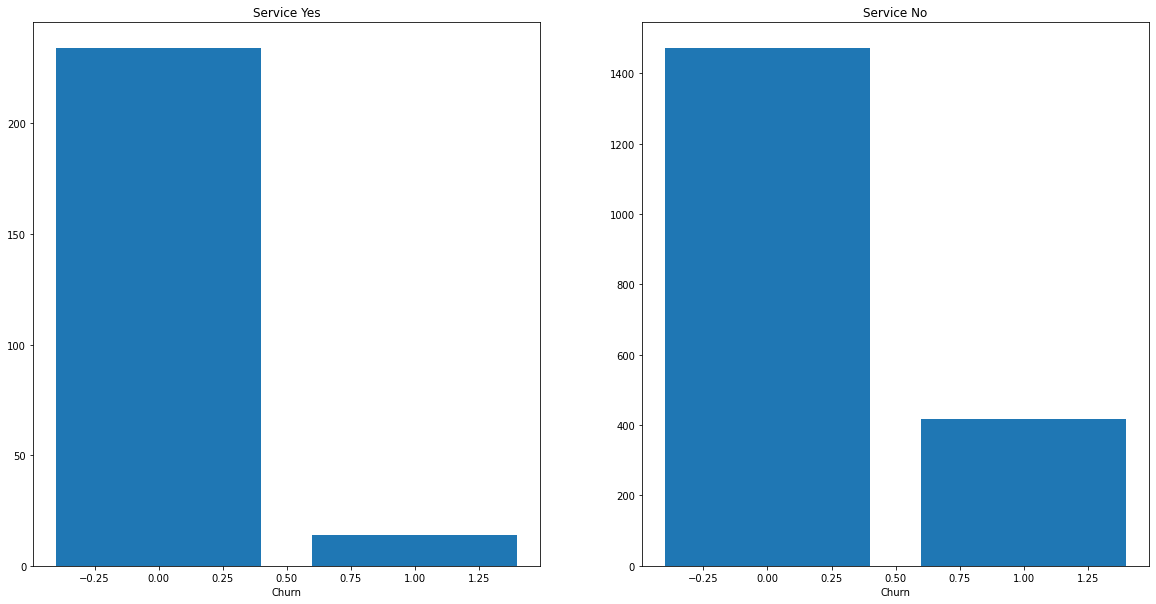

In [ ]:
#Визуализируем
fig, axs = plt.subplots(1, 2, figsize=(20,10))

for i in range(2):
  axs[i].bar(service_yes_no[i].groupby('Churn').count().index, service_yes_no[i].groupby('Churn').count().iloc[:, 0])
  axs[i].set_title(service_yes_no_name[i])
  axs[i].set_xlabel('Churn')

plt.show()



---


В целом видно, что при подключенных сервисах, отток не значителен. Это говорит о высоком качестве сервисов предоставляемых клиетам. В целом можно сделать вывод, что клиенты у которых подключенны все возможные сервисы, являются стабильными, и вероятность их ухода мала.


Можно объединить эти фичи и сгруппировать на три части:

1.   Те кто пользуется всеми  сервисами
2.   Те кто не пользуется ни одним сервисом
3.   Те кто пользуется хотя бы одним


In [ ]:
#Создадим новый признак Services
df_main['Services'] = None

In [ ]:
#Объединим признаки в один для удобства

for i in range(len(df_main)):
  #Если клиент пользуется всеми сервисами, то в новом признаке Services ставим 1
  if (df_main.iloc[i, 8] == 1) & (df_main.iloc[i, 9] == 1) & (df_main.iloc[i, 10] == 1) & (df_main.iloc[i, 11] == 1) & (df_main.iloc[i, 12] == 1) & (df_main.iloc[i, 13] == 1):
    df_main.iloc[i, 20] = 1
  #Если клиент не пользуется ни одним сервисом, то в новом признаке Services ставим 0
  elif (df_main.iloc[i, 8] != 1) & (df_main.iloc[i, 9] != 1) & (df_main.iloc[i, 10] != 1) & (df_main.iloc[i, 11] != 1) & (df_main.iloc[i, 12] != 1) & (df_main.iloc[i, 13] != 1):
    df_main.iloc[i, 20] = 0
  #Если клиент пользуется хотя бы одним сервисом (но не всеми), то в новом признаке Services ставим 2
  else:
    df_main.iloc[i, 20] = 2

In [ ]:
#Удалим старые признаки
df_main = df_main.drop(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)

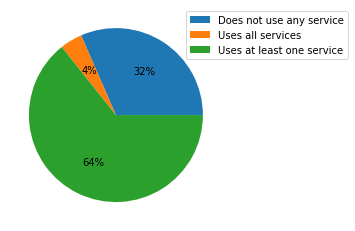

In [ ]:
#Визуализируем соотношение клиентов которые пользуются или не пользуются сервисами
plt.pie(df_main.groupby('Services').count().iloc[:, 0], autopct='%1.0f%%')
plt.legend(labels=['Does not use any service', 'Uses all services', 'Uses at least one service'], loc='upper left', bbox_to_anchor=(0.8, 1))

plt.show()

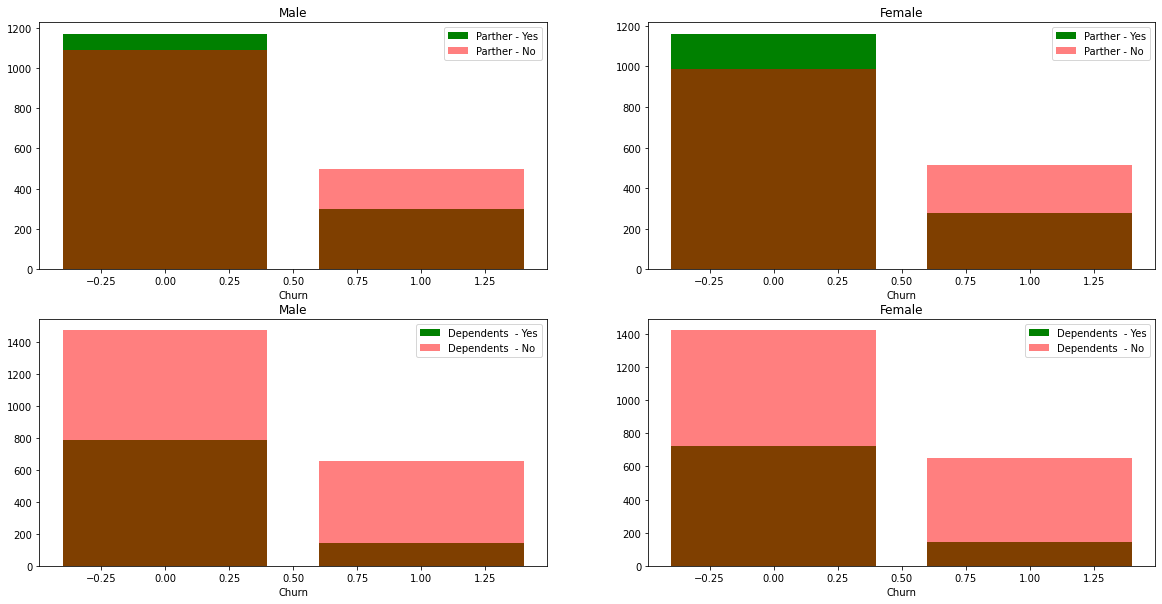

In [ ]:
#Наконец посмотрим зависимость ухода клиента от пола и семейного положения
#Берём датасет мужчин и женщин
male_df = df_main[df_main['gender'] == 0]
female_df = df_main[df_main['gender'] == 1]


fig, axs = plt.subplots(2, 2, figsize=(20, 10))

#Эти графики можно завернуть в цикл, но я решил написать код более развернуто (Если нужно, могу написать через цикл, но развернуто - более наглядно)

#На первых двух графиках смотрим  как происходит отток по наличию партнёра (делим на мужчин и женщин)
axs[0][0].bar(male_df[male_df['Partner'] == 1].groupby('Churn').count().index, 
              male_df[male_df['Partner'] == 1].groupby('Churn').count().iloc[:, 0], 
              label='Parther - Yes', color='green')

axs[0][0].bar(male_df[male_df['Partner'] == 0].groupby('Churn').count().index, 
              male_df[male_df['Partner'] == 0].groupby('Churn').count().iloc[:, 0], 
              alpha=0.5, 
              label='Parther - No', color='red')
axs[0][0].set_title('Male')
axs[0][0].set_xlabel('Churn')
axs[0][0].legend()


axs[0][1].bar(female_df[female_df['Partner'] == 1].groupby('Churn').count().index, 
              female_df[female_df['Partner'] == 1].groupby('Churn').count().iloc[:, 0], 
              label='Parther - Yes', color='green')
axs[0][1].bar(female_df[female_df['Partner'] == 0].groupby('Churn').count().index, 
              female_df[female_df['Partner'] == 0].groupby('Churn').count().iloc[:, 0], 
              alpha=0.5, 
              label='Parther - No', color='red')
axs[0][1].set_title('Female')
axs[0][1].set_xlabel('Churn')
axs[0][1].legend()

#На вторых двух графиках смотрим  как происходит отток по наличию иждивенцев (делим на мужчин и женщин)
axs[1][0].bar(male_df[male_df['Dependents'] == 1].groupby('Churn').count().index, 
              male_df[male_df['Dependents'] == 1].groupby('Churn').count().iloc[:, 0], 
              label='Dependents  - Yes', color='green')
axs[1][0].bar(male_df[male_df['Dependents'] == 0].groupby('Churn').count().index, 
              male_df[male_df['Dependents'] == 0].groupby('Churn').count().iloc[:, 0], 
              alpha=0.5, 
              label='Dependents  - No', color='red')
axs[1][0].set_title('Male')
axs[1][0].set_xlabel('Churn')
axs[1][0].legend()


axs[1][1].bar(female_df[female_df['Dependents'] == 1].groupby('Churn').count().index, 
              female_df[female_df['Dependents'] == 1].groupby('Churn').count().iloc[:, 0], 
              label='Dependents  - Yes', color='green')
axs[1][1].bar(female_df[female_df['Dependents'] == 0].groupby('Churn').count().index, 
              female_df[female_df['Dependents'] == 0].groupby('Churn').count().iloc[:, 0], 
              alpha=0.5, 
              label='Dependents  - No', color='red')
axs[1][1].set_title('Female')
axs[1][1].set_xlabel('Churn')
axs[1][1].legend()

plt.show()



---



Из графиков видно, что чаще всего происходит отток клиентов без партнёров и без иждевенцев. То есть, наибольший отток именно одиноких людей. Так как распределение мужчин и женщин в общем датасете 51% на 49%, у нас нет перегибов по признакку gender, что хорошо для дальнейшего построения модели.

Эти признаки тоже можно было бы объединить в один признак и поделить на две группы: 1) Одинокий клиент 2) Не одинокий клиент

In [ ]:
#Создадим новый признак
df_main['Family'] = None

In [ ]:
#Объединим признаки в один для удобства

for i in range(len(df_main)):
  #Если у клиента есть партнёр или иждивенец, то в новом признаке Family ставим 1
  if (df_main.iloc[i, 2] == 1) | (df_main.iloc[i, 3] == 1):
    df_main.iloc[i, 15] = 1
  #Если у клиента нет партнёра и иждивенеца, то в новом признаке Family ставим 0
  elif (df_main.iloc[i, 2] != 1) & (df_main.iloc[i, 3] != 1):
    df_main.iloc[i, 15] = 0

In [ ]:
#Удалим старые признаки
df_main = df_main.drop(['Partner', 'Dependents'], axis=1)

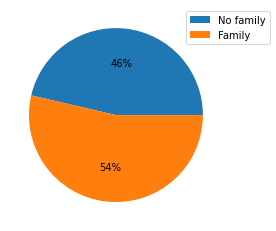

In [ ]:
#Визуализируем соотношение одиноких и семейных клиентов 
plt.pie(df_main.groupby('Family').count().iloc[:, 0], autopct='%1.0f%%')
plt.legend(labels=['No family', 'Family'], loc='upper left', bbox_to_anchor=(0.8, 1))

plt.show()

In [ ]:
#Смотрим как теперь выглядит датасет
df_main.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Services,Family
0,0,0,72,1,1,0,2,0,3,24.10,1734.65,0,0,1
1,1,0,44,1,0,2,0,1,3,88.15,3973.20,0,2,0
2,1,1,38,1,1,2,0,1,2,74.95,2869.85,1,0,1
3,0,0,4,1,0,1,0,1,0,55.90,238.50,0,2,0
4,0,0,2,1,0,1,0,0,0,53.45,119.50,0,2,0




---



---


Теперь датасет подготовлен для дальнейшей работы и построению моделей

# 3. Построение моделей для прогнозирования оттока

Мы определили, что имеющийся датасет несбалансирован. При очень большом соотношении доминирующего класса к минорному можно применить методы борьбы с несбалансированными датасетами - undersampling и oversampling, либо метод SMOTE.

В нашем случае, мы не будем перебалансировать датасет, а просто учтём это при выборе метрик качества.Стоит отметить что точность (Precision) и полнота (recall) не зависят от соотношения размеров классов. 

Для начала будем использовать следующие метрики:
  *   Покажем матрицу ошибок (confusion matrix) для каждой модели
  *   Recall (в нашем случае, более важно максимизировать эту метрику)
  *   Precision


Далее будем смотреть на результаты работы моделей и их метрики качества, и редактировать данные.

In [ ]:
#Импортируем библиотеки
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

import warnings

In [ ]:
#Разделим наш датасет на тренировочную и тестовую части
df_target = df_main.loc[:, 'Churn']
df_data = df_main.drop('Churn', axis=1)

#Так как датасет несбалансированный, то задаем параметр stratify = целевой признак
x_train, x_test, y_train, y_test = train_test_split(df_data, df_target, stratify=df_target, test_size=0.2, random_state=17)

С помощью GridSearchCV найдём наилучшие параметры для каждой модели.

Были выбраны следующие модели машинного обучения
(я использовал те модели, которые знаю):

1. K-ближайших соседей - хорошо подходит для бинарной классификации
2. Деревья решений - наиболее интерпретируемый алгоритм
3. Логистическая регрессия - хорошо подходит для бинарной классификации

In [ ]:
#Алгоритм kNN
knn_parametrs = {'n_neighbors': range(1, 15)}

#Decision Trees
dtc_parametrs = {'max_depth': range(2, 26, 2), 'min_samples_leaf': range(1, 5)}

#LogisticRegression
lr_parametrs = {'C': np.arange(0.1, 1, 0.1)}

#Для кросс-валидации
skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

In [ ]:
#Создадим функцию для нахождения наилучших параметров
def best_params(reg, parametrs, X, y, cv):
  grid = GridSearchCV(reg, parametrs, cv=cv, scoring='roc_auc')
  grid = grid.fit(X, y)
  return grid.best_params_

In [ ]:
#Подбираем лучшие параметры
knn_best_parametrs = best_params(KNeighborsClassifier(), 
                                 knn_parametrs, x_train, y_train, skf)
dtc_best_parametrs = best_params(DecisionTreeClassifier(random_state = 17),
                                 dtc_parametrs, x_train, y_train, skf)
lr_best_parametrs = best_params(LogisticRegression(random_state = 17),
                                 lr_parametrs, x_train, y_train, skf)

#Здесь выскакивало предупреждение, я его скрыл
warnings.filterwarnings('ignore')

In [ ]:
#Посмотрим какие параметры оказались наилучшими
print('kNN\n', '-'*20, '\n', knn_best_parametrs, '\n')
print('Decision Trees\n', '-'*20, '\n', dtc_best_parametrs, '\n')
print('LogisticRegression\n', '-'*20, '\n', lr_best_parametrs, '\n')


kNN
 -------------------- 
 {'n_neighbors': 14} 

Decision Trees
 -------------------- 
 {'max_depth': 4, 'min_samples_leaf': 1} 

LogisticRegression
 -------------------- 
 {'C': 0.5} 



**Строим модели:**
(с учетом наилучших параметров)


In [ ]:
#Алгоритм kNN
knn = KNeighborsClassifier(**knn_best_parametrs)
knn_model = knn.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)

In [ ]:
#Decision Trees
dtc = DecisionTreeClassifier(**dtc_best_parametrs, random_state=17)
dtc_model = dtc.fit(x_train, y_train)
dtc_pred = dtc_model.predict(x_test)

In [ ]:
#LogisticRegression
lr = LogisticRegression(**lr_best_parametrs, random_state=17)
lr_model = lr.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

#Здесь выскакивало предупреждение, я его скрыл
warnings.filterwarnings('ignore')

# 4. Сравнение качества моделей 

In [ ]:
#Импортируем библиотеки
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

**Проверим качество работы моделей**


С помощью метрики ROC_AUC

In [ ]:
#Алгоритм kNN
knn_roc_auc = roc_auc_score(y_test, knn_pred)

#Decision Trees
dtc_roc_auc = roc_auc_score(y_test, dtc_pred)

#LogisticRegression
lr_roc_auc = roc_auc_score(y_test, lr_pred)

In [ ]:
print('Алгоритм kNN\n', '-'*30, '\n', f'ROC-AUC score равен {round(knn_roc_auc, 4)} \n \n' )
print('Алгоритм Decision Trees\n', '-'*30, '\n', f'ROC-AUC score равен {round(dtc_roc_auc, 4)} \n \n' )
print('Алгоритм LogisticRegression\n', '-'*30, '\n', f'ROC-AUC score равен {round(lr_roc_auc, 4)} \n \n' )

Алгоритм kNN
 ------------------------------ 
 ROC-AUC score равен 0.6482 
 

Алгоритм Decision Trees
 ------------------------------ 
 ROC-AUC score равен 0.705 
 

Алгоритм LogisticRegression
 ------------------------------ 
 ROC-AUC score равен 0.7324 
 



Наилучший результат по метрике ROC-AUC показала модель Logostoc Regression.

Выбрав модель Logostoc Regression посмотрим на ее качество с помощью других метрик (точность и полнота), а также выведем матрицу ошибок.

In [ ]:
#LogisticRegression
lr_matrix = confusion_matrix(y_test, lr_pred)
lr_recall_score = recall_score(y_test, lr_pred)
lr_precision_score = precision_score(y_test, lr_pred)
lr_roc_auc = roc_auc_score(y_test, lr_pred)

In [ ]:
print('Алгоритм LogisticRegression\n', '-'*30, '\n', lr_matrix, '\n', f'Recall score равен {round(lr_recall_score, 4)} \n', f'Precision score равен {round(lr_precision_score, 4)} \n', f'ROC-AUC score равен {round(lr_roc_auc, 4)} \n \n' )

Алгоритм LogisticRegression
 ------------------------------ 
 [[777 103]
 [133 185]] 
 Recall score равен 0.5818 
 Precision score равен 0.6424 
 ROC-AUC score равен 0.7324 
 



В результате видно, что интересующая нас метрик Recall довольно низкая. Далее попробуем увеличить качество в соответствии с этой метрикой. Попробуем увеличить веса для экземпляров класса. Это должно повысить метрику Recall.

In [ ]:
#Создадим веса для экземпляров класса
lr_weights = {0: 1, 1: 2}

In [ ]:
#Ещё раз построим модель LogisticRegression, но с параметром lr_weights
lr_weights = LogisticRegression(**lr_best_parametrs, random_state=17, class_weight=lr_weights)
lr_model_weights = lr_weights.fit(x_train, y_train)
lr_pred_weights = lr_model_weights.predict(x_test)

#Здесь выскакивало предупреждение, я его скрыл
warnings.filterwarnings('ignore')

In [ ]:
#Смотрим качество работы модели LogisticRegression с весами
lr_matrix_weights = confusion_matrix(y_test, lr_pred_weights)
lr_recall_score_weights = recall_score(y_test, lr_pred_weights)
lr_precision_score_weights = precision_score(y_test, lr_pred_weights)
lr_roc_auc_weights = roc_auc_score(y_test, lr_pred_weights)

In [ ]:
print('Алгоритм LogisticRegression\n', '-'*30, '\n', lr_matrix_weights, '\n', f'Recall score равен {round(lr_recall_score_weights, 4)} \n', f'Precision score равен {round(lr_precision_score_weights, 4)} \n', f'ROC-AUC score равен {round(lr_roc_auc_weights, 4)} \n \n' )

Алгоритм LogisticRegression
 ------------------------------ 
 [[670 210]
 [ 69 249]] 
 Recall score равен 0.783 
 Precision score равен 0.5425 
 ROC-AUC score равен 0.7722 
 



Повысив вес метки оттока клиента, мы значительно увеличили качество работы модели по метрике Recall (до 78%).

Теперь построим модель с помощью алгоритма xgboost.

In [ ]:
#Создадим объекты DMatrix для работы с xgboost
xgb_dtrain = xgb.DMatrix(np.array(x_train), np.array(y_train))
xgb_dtest = xgb.DMatrix(np.array(x_test), np.array(y_test))

#Зададим параметры xgboost из которых будем искать наилучшие
xgb_parametrs = {'learning_rate': (0.05, 0.10, 0.15, 0.20),  'max_depth': [1, 2, 3, 4, 5], 'n_estimators': range(50, 300, 50)}

#Количество итераций
num_rounds = 30

In [ ]:
#Подбираем лучшие параметры для xgboost
xgb_best_parametrs = best_params(xgb.XGBClassifier(), 
                                 xgb_parametrs, np.array(x_train), np.array(y_train), skf)

In [ ]:
#Посмотрим какие параметры оказались наилучшими
print('XGBoost best parametrs\n', '-'*20, '\n', xgb_best_parametrs, '\n')

XGBoost best parametrs
 -------------------- 
 {'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 150} 



Далее будем задавать полученные, наилучшие параметры модели.

In [ ]:
#Создадим модель xgboost
xgb_model = xgb.train(xgb_best_parametrs, xgb_dtrain, num_rounds)

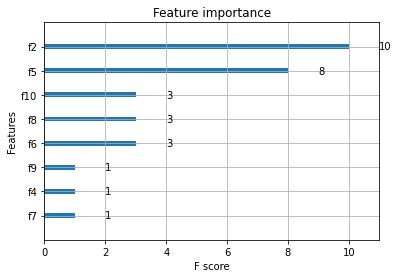

In [ ]:
#Посмотрим какие фичи модель выделила больше всего
xgb.plot_importance(xgb_model)

plt.show()

In [ ]:
#Создадим предсказание xgb модели
xgb_pred = xgb_model.predict(xgb_dtest)

Так как xgb predict возвращает вероятности, мы можем задать пороговое значение.

In [ ]:
#Зададим порог в 50%
xgb_pred_50_percent = (xgb_pred > 0.5).astype(int)

# np.sum(xgb_pred_50_percent)

Проверим качество работы модели с помощью выбранных метрик

In [ ]:
xgb_matrix = confusion_matrix(y_test, xgb_pred_50_percent)
xgb_recall_score = recall_score(y_test, xgb_pred_50_percent)
xgb_precision_score = precision_score(y_test, xgb_pred_50_percent)
xgb_roc_auc = roc_auc_score(y_test, xgb_pred_50_percent)

In [ ]:
print('Алгоритм XGBoost (порог 50%)\n', '-'*30, '\n', xgb_matrix, '\n', f'Recall score равен {round(xgb_recall_score, 4)} \n', f'Precision score равен {round(xgb_precision_score, 4)} \n', f'ROC-AUC score равен {round(xgb_roc_auc, 4)} \n \n' )

Алгоритм XGBoost (порог 50%)
 ------------------------------ 
 [[831  49]
 [195 123]] 
 Recall score равен 0.3868 
 Precision score равен 0.7151 
 ROC-AUC score равен 0.6656 
 



Изменим порог с 50% на 45%

In [ ]:
#Зададим порог в 45%
xgb_pred_45_percent = (xgb_pred > 0.45).astype(int)

# np.sum(xgb_pred_45_percent)

In [ ]:
xgb_matrix_45 = confusion_matrix(y_test, xgb_pred_45_percent)
xgb_recall_score_45 = recall_score(y_test, xgb_pred_45_percent)
xgb_precision_score_45 = precision_score(y_test, xgb_pred_45_percent)
xgb_roc_auc_45 = roc_auc_score(y_test, xgb_pred_45_percent)

In [ ]:
print('Алгоритм XGBoost (порог 45%)\n', '-'*30, '\n', xgb_matrix_45, '\n', f'Recall score равен {round(xgb_recall_score_45, 4)} \n', f'Precision score равен {round(xgb_precision_score_45, 4)} \n', f'ROC-AUC score равен {round(xgb_roc_auc_45, 4)} \n \n' )

Алгоритм XGBoost (порог 45%)
 ------------------------------ 
 [[794  86]
 [140 178]] 
 Recall score равен 0.5597 
 Precision score равен 0.6742 
 ROC-AUC score равен 0.731 
 



Метрика Recall увеличилась, но всё ещё уступает остальным метрикам.

Чтобы увеличить полноту (Recall) зададим вручную веса для экземпляров класса.

In [ ]:
#Создадим веса для экземпляров класса
weights = np.zeros(len(y_train))
weights[y_train == 0] = 1
weights[y_train == 1] = 2

In [ ]:
#Ещё раз создадим объекты DMatrix для работы с xgboost (укажим наши веса weights)
xgb_dtrain1 = xgb.DMatrix(np.array(x_train), np.array(y_train), weight=weights)
xgb_dtest1 = xgb.DMatrix(np.array(x_test), np.array(y_test))

#Создадим модель xgboost
xgb_model1 = xgb.train(xgb_best_parametrs, xgb_dtrain1, num_rounds)

#Создадим предсказание xgb модели
xgb_pred1 = xgb_model1.predict(xgb_dtest1)

#Зададим порог в 45%
xgb_pred_45_percent1 = (xgb_pred1 > 0.45).astype(int)

In [ ]:
xgb_matrix_45_weights = confusion_matrix(y_test, xgb_pred_45_percent1)
xgb_recall_score_45_weights = recall_score(y_test, xgb_pred_45_percent1)
xgb_precision_score_45_weights = precision_score(y_test, xgb_pred_45_percent1)
xgb_roc_auc_45_weights = roc_auc_score(y_test, xgb_pred_45_percent1)

In [ ]:
print('Алгоритм XGBoost (порог 45%)\n', 'Добавлены веса для экземпляров класса \n', '-'*35, '\n', xgb_matrix_45_weights, '\n', f'Recall score равен {round(xgb_recall_score_45_weights, 4)} \n', f'Precision score равен {round(xgb_precision_score_45_weights, 4)} \n', f'ROC-AUC score равен {round(xgb_roc_auc_45_weights, 4)} \n \n' )

Алгоритм XGBoost (порог 45%)
 Добавлены веса для экземпляров класса 
 ----------------------------------- 
 [[599 281]
 [ 41 277]] 
 Recall score равен 0.8711 
 Precision score равен 0.4964 
 ROC-AUC score равен 0.7759 
 



Таким образом, мы получили очень хорошие показатели модели по метрике Recall (87%). Однако, упала точность предсказания Precision.

**Выводы по всей работе**



---


В результате проделанной работы был загружен и обработан весь датасет, удалены пропущенные значения. Все признаки переведенны в цифровой формат. Часть признаков была удалена как не нужные. Некоторые фичи были сгруппированы в одну, для удобства построения модели.

Были определенны и обоснованы альтернативные гипотизы (альтернативные по отношению к нулевой гипотизе) и зависимости между признаками.

На основе имеющихся данных, были определенны необходимые метрик и модели машинного обучения. Были найдены наилучшие параметры, для определенных моделей.

В итоге были построенны две модели:   

1.   Модель на основе алгоритма Logistic Regression, которая с вероятностью 78% предсказывает уход клиента.
2.   Модель на основе алгоритма XGBoost, которая с вероятностью 87% предсказывает уход клиента.